In [1]:
from google.colab import files
uploaded = files.upload()

Saving mystocks.csv to mystocks.csv


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import io
print('ook')

ook


In [4]:
dataframe = pd.read_csv(io.StringIO(uploaded['mystocks.csv'].decode('utf-8')))
#dataframe=pd.read_csv('E:\machine learning\mystocks.csv')
#dataframe=pd.read_csv('Desktop\mystocks.csv')

year_list=dataframe.iloc[:,0].unique()

print(year_list)

[2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005
 2004 2003 2002 2001 2000]


In [5]:
dataframe.head()

,year,month,open,high,low,close,volume
0,2018,3,177.32,177.470,173.66,175.82,46812368
1,2018,3,180.29,183.500,177.62,178.02,151720299
2,2018,3,175.21,180.000,174.27,179.98,138442235
3,2018,3,176.35,180.615,172.45,176.21,196432091
4,2018,2,172.05,175.650,171.01,175.50,133197874


In [6]:
grouped_data=dataframe.groupby('year').mean()['close']
close_values=grouped_data.iloc[:].values
print(close_values)

[ 70.29568627  20.22980769  19.12557692  18.43825     35.58358491
  52.97270192  71.04122885 128.39352885 141.87384808 146.94807547
 260.003325   363.318      573.26206154 471.4865     301.707375
 119.75518868 104.49788462 150.5775     173.0775    ]


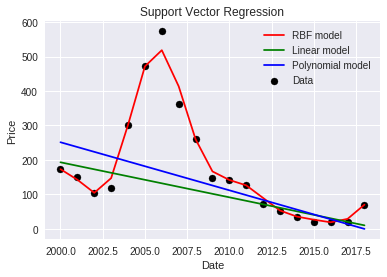

(20222.951063822708, 167.31141786577763, 14155.8095066211)


In [7]:
def predict_price(dates, prices, x):
	dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1
  #Linear
	svr_lin = SVR(kernel= 'linear', C= 1e3)
	svr_lin.fit(dates, prices)
  #RBF
	svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
	svr_rbf.fit(dates, prices) # fitting the data points in the models
  #Poly
	svr_poly = SVR(kernel= 'poly', C= 0.00001, degree= 2)
	svr_poly.fit(dates,prices)

    
	plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints
	plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
	plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
	plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
	plt.xlabel('Date')
	plt.ylabel('Price')
	plt.title('Support Vector Regression')
	plt.legend()
	plt.show()
	return svr_lin.predict(x)[0],svr_rbf.predict(x)[0],svr_poly.predict(x)[0]
  
predicted_price = predict_price(year_list, close_values, 29)
print(predicted_price)